In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import re
from datetime import datetime,date,time
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split


In [2]:
#Reading our weather data file
df=pd.read_csv('train.csv')

In [3]:
# Let's have a look at the data
df.head()

,IST,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,...,MeanWindSpeedKm/h,MaxGustSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,date,month,year,nd
0,01/01/13,15,9,4,12,7,4,100,95,67,...,6,NaN,0.0,2.0,Fog,302,1,1,2013,9
1,02/01/13,9,7,6,9,7,6,100,100,100,...,6,NaN,0.0,1.0,Fog,277,2,1,2013,10
2,03/01/13,10,7,4,10,7,4,100,99,87,...,10,NaN,0.0,2.0,Fog,299,3,1,2013,13
3,04/01/13,13,8,3,9,5,3,100,92,63,...,6,NaN,0.0,3.0,Fog,289,4,1,2013,11
4,05/01/13,11,6,2,9,6,2,100,97,76,...,8,NaN,0.0,1.0,Fog,295,5,1,2013,10


In [4]:
# To check the data type of the variables. We'll have to change object to int for sklearn processing.
df.dtypes

IST                         object
MaxTemperatureC              int64
MeanTemperatureC             int64
MinTemperatureC              int64
DewPointC                    int64
MeanDewPointC                int64
MinDewpointC                 int64
MaxHumidity                  int64
MeanHumidity                 int64
MinHumidity                  int64
MaxSeaLevelPressurehPa       int64
MeanSeaLevelPressurehPa      int64
MinSeaLevelPressurehPa       int64
MaxVisibilityKm              int64
MeanVisibilityKm             int64
MinVisibilitykM              int64
MaxWindSpeedKm/h             int64
MeanWindSpeedKm/h            int64
MaxGustSpeedKm/h           float64
Precipitationmm            float64
CloudCover                 float64
Events                      object
WindDirDegrees               int64
date                         int64
month                        int64
year                         int64
nd                           int64
dtype: object

In [5]:
#Let's check the number of missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

IST                          0
MaxTemperatureC              0
MeanTemperatureC             0
MinTemperatureC              0
DewPointC                    0
MeanDewPointC                0
MinDewpointC                 0
MaxHumidity                  0
MeanHumidity                 0
MinHumidity                  0
MaxSeaLevelPressurehPa       0
MeanSeaLevelPressurehPa      0
MinSeaLevelPressurehPa       0
MaxVisibilityKm              0
MeanVisibilityKm             0
MinVisibilitykM              0
MaxWindSpeedKm/h             0
MeanWindSpeedKm/h            0
MaxGustSpeedKm/h           854
Precipitationmm              0
CloudCover                 259
Events                     569
WindDirDegrees               0
date                         0
month                        0
year                         0
nd                           0
dtype: int64

In [6]:
# Too many missing values, hence a useless feature
del df['MaxGustSpeedKm/h']

In [7]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)

In [8]:
df.describe()

/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,MaxSeaLevelPressurehPa,...,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,Precipitationmm,CloudCover,WindDirDegrees,date,month,year,nd
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,884.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,30.399825,24.628171,19.273841,17.791776,15.031496,12.069991,83.420822,61.916885,38.455818,1011.705162,...,1.337708,19.734033,7.749781,0.000219,3.069005,217.760280,15.628171,6.308836,2014.083990,30.406824
std,7.607621,7.566342,7.934898,6.103202,6.618241,7.341101,18.400834,19.586556,18.884512,7.044246,...,1.051079,15.236637,3.722939,0.007395,1.648909,95.590305,8.796840,3.533426,0.894592,7.597114
min,9.000000,6.000000,1.000000,4.000000,1.000000,-5.000000,17.000000,13.000000,6.000000,996.000000,...,0.000000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2013.000000,9.000000
25%,25.000000,18.000000,12.000000,13.000000,9.000000,6.000000,77.000000,50.000000,25.000000,1005.000000,...,1.000000,14.000000,5.000000,0.000000,NaN,116.500000,8.000000,3.000000,2013.000000,25.000000
50%,32.000000,27.000000,21.000000,17.000000,14.000000,11.000000,88.000000,63.000000,35.000000,1013.000000,...,1.000000,19.000000,8.000000,0.000000,NaN,270.000000,16.000000,6.000000,2014.000000,32.000000
75%,36.000000,31.000000,26.000000,23.500000,21.000000,19.000000,100.000000,76.000000,51.000000,1018.000000,...,2.000000,23.000000,10.000000,0.000000,NaN,292.000000,23.000000,9.000000,2015.000000,36.000000
max,46.000000,39.000000,34.000000,30.000000,27.000000,27.000000,100.000000,100.000000,100.000000,1026.000000,...,4.000000,222.000000,21.000000,0.250000,8.000000,359.000000,31.000000,12.000000,2016.000000,46.000000


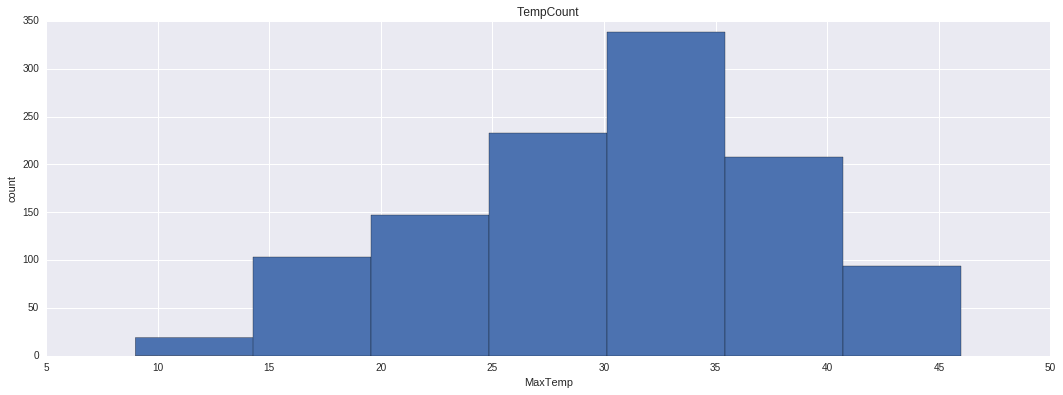

In [9]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['nd'],bins = 7) 
plt.title('TempCount')
plt.xlabel('MaxTemp')
plt.ylabel('count')
plt.show()

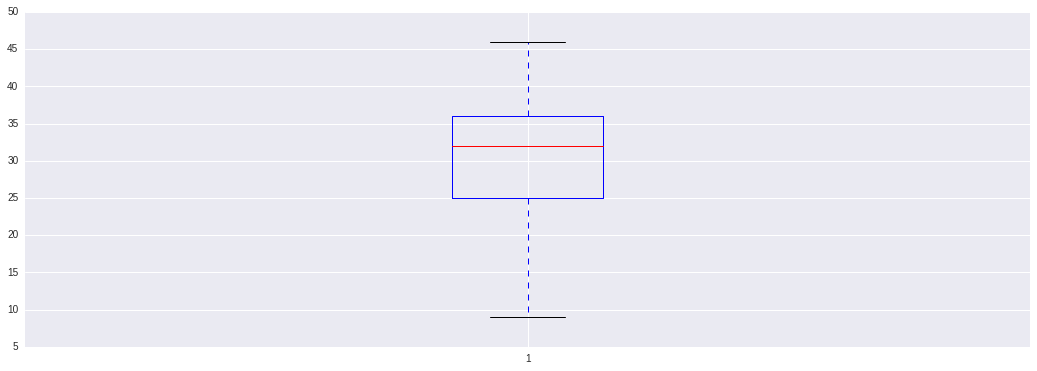

In [10]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(df['nd'])
plt.show()

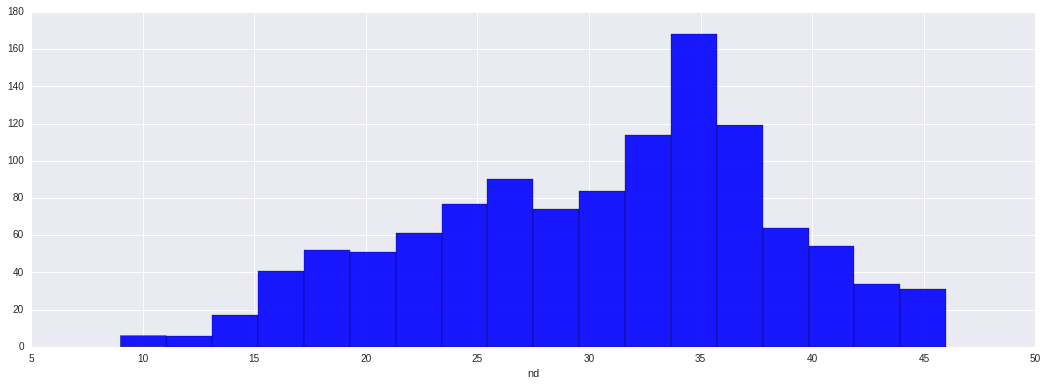

In [11]:
sns.distplot(df['nd'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

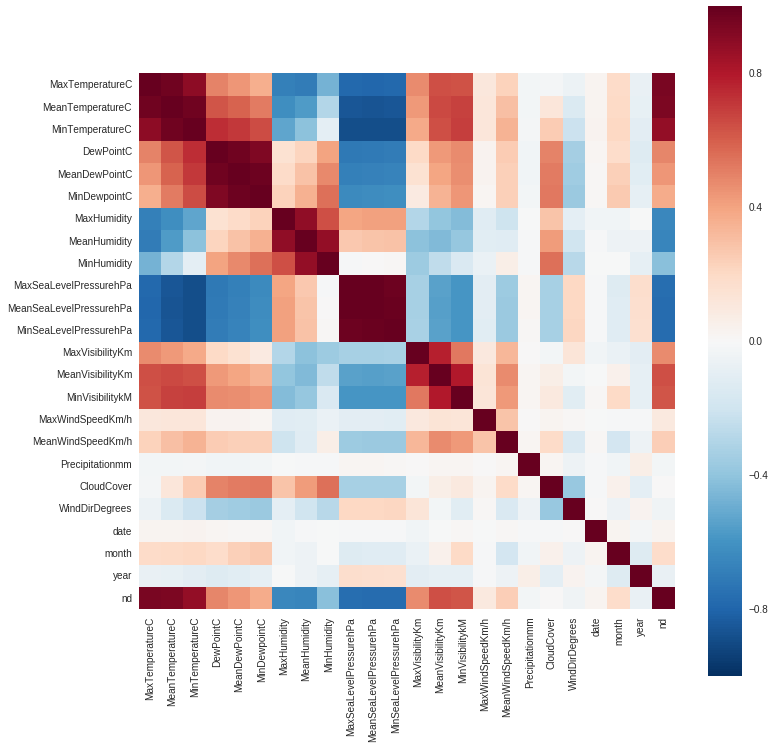

In [12]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 0:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [13]:
cor_dict = corr['nd'].to_dict()
del cor_dict['nd']
print("List the numerical features decendingly by their correlation with nd:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with nd:

MaxTemperatureC: 	0.953064112042
MeanTemperatureC: 	0.937787071904
MinTemperatureC: 	0.875850603521
MeanSeaLevelPressurehPa: 	-0.771891682413
MinSeaLevelPressurehPa: 	-0.76777139172
MaxSeaLevelPressurehPa: 	-0.765061726852
MeanHumidity: 	-0.66097592518
MaxHumidity: 	-0.654529884219
MeanVisibilityKm: 	0.644567878883
MinVisibilitykM: 	0.628350278001
DewPointC: 	0.491075255637
MaxVisibilityKm: 	0.473647173511
MeanDewPointC: 	0.441826882206
MinHumidity: 	-0.42063517553
MinDewpointC: 	0.368601037309
MeanWindSpeedKm/h: 	0.242395808817
month: 	0.180795026996
MaxWindSpeedKm/h: 	0.0954347671145
year: 	-0.0713860193032
WindDirDegrees: 	-0.0408045492867
date: 	0.0275797366908
Precipitationmm: 	-0.0249661279985
CloudCover: 	0.00408435252576


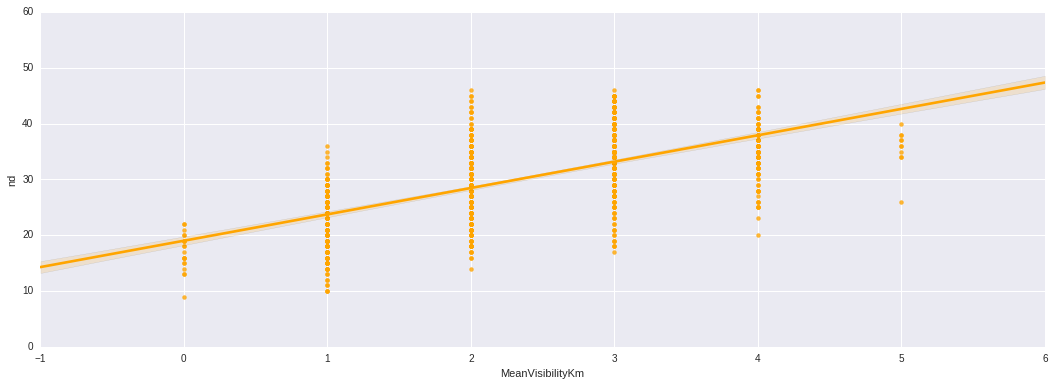

In [14]:
sns.regplot(x = 'MeanVisibilityKm', y = 'nd', data = df, color = 'Orange')

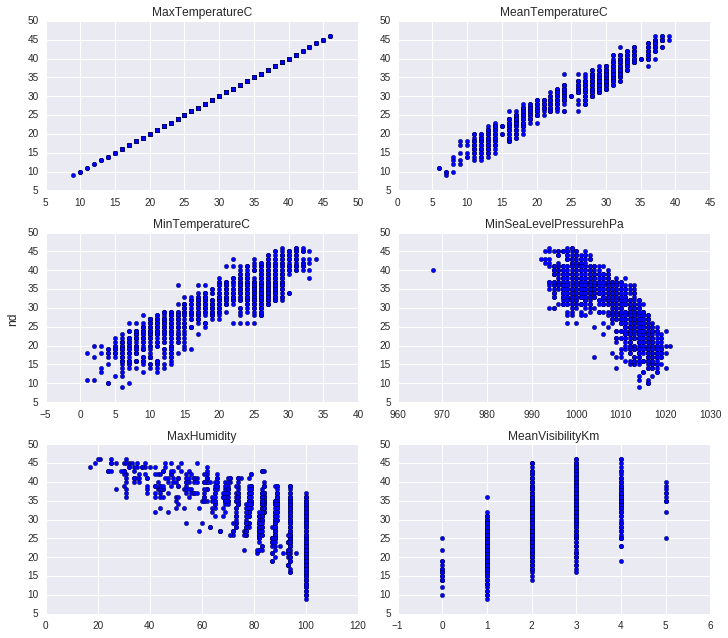

In [15]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df.MaxTemperatureC.values
axarr[0, 0].scatter(df.MaxTemperatureC.values, price)
axarr[0, 0].set_title('MaxTemperatureC')
axarr[0, 1].scatter(df.MeanTemperatureC.values, price)
axarr[0, 1].set_title('MeanTemperatureC')
axarr[1, 0].scatter(df.MinTemperatureC.values, price)
axarr[1, 0].set_title('MinTemperatureC')
axarr[1, 1].scatter(df['MinSeaLevelPressurehPa'].values, price)
axarr[1, 1].set_title('MinSeaLevelPressurehPa')
axarr[2, 0].scatter(df.MaxHumidity.values, price)
axarr[2, 0].set_title('MaxHumidity')
axarr[2, 1].scatter(df.MeanVisibilityKm.values, price)
axarr[2, 1].set_title('MeanVisibilityKm')
f.text(-0.01, 0.5, 'nd', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [16]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

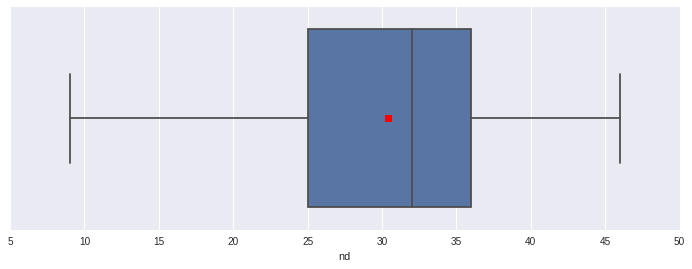

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'nd', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

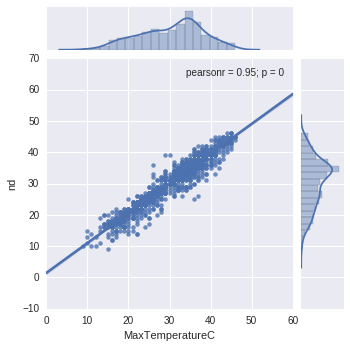

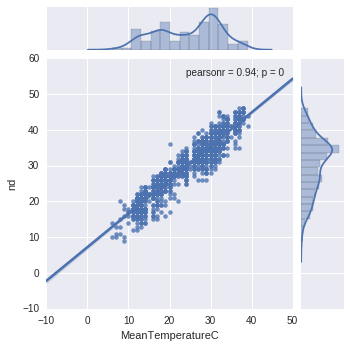

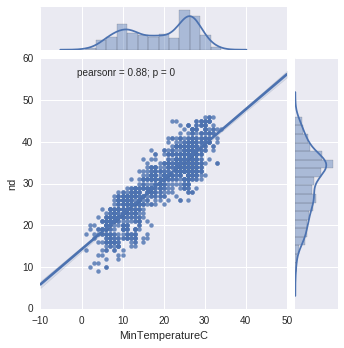

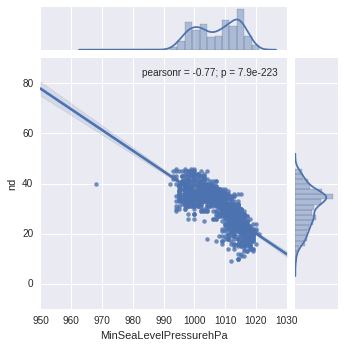

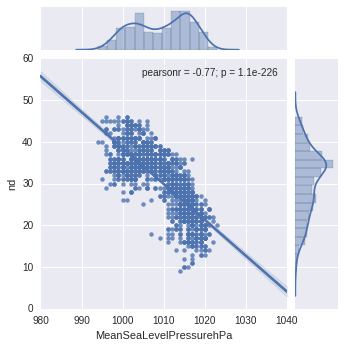

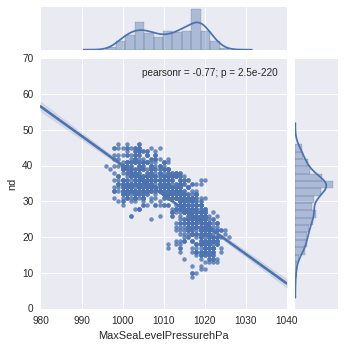

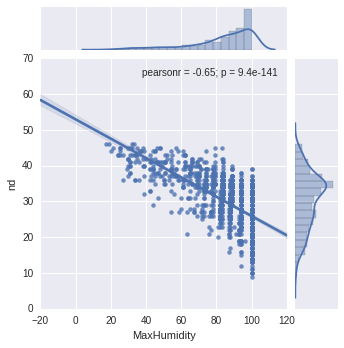

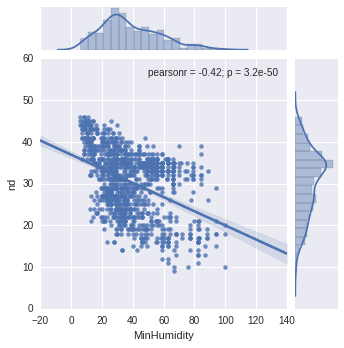

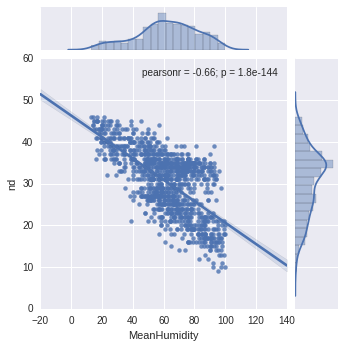

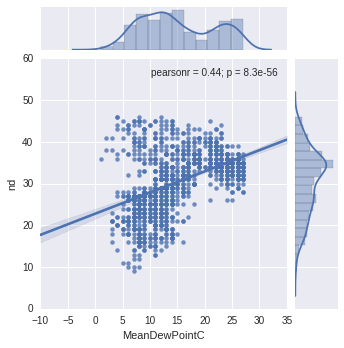

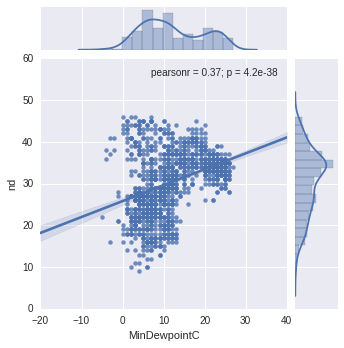

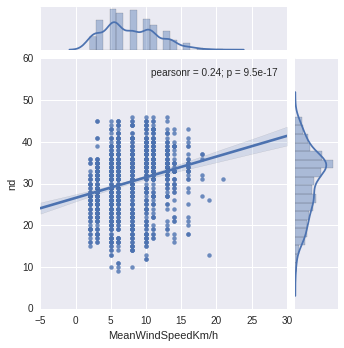

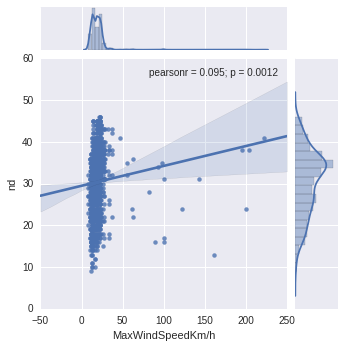

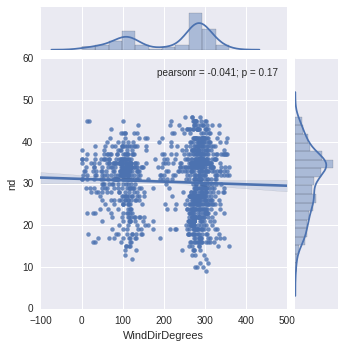

In [18]:
-

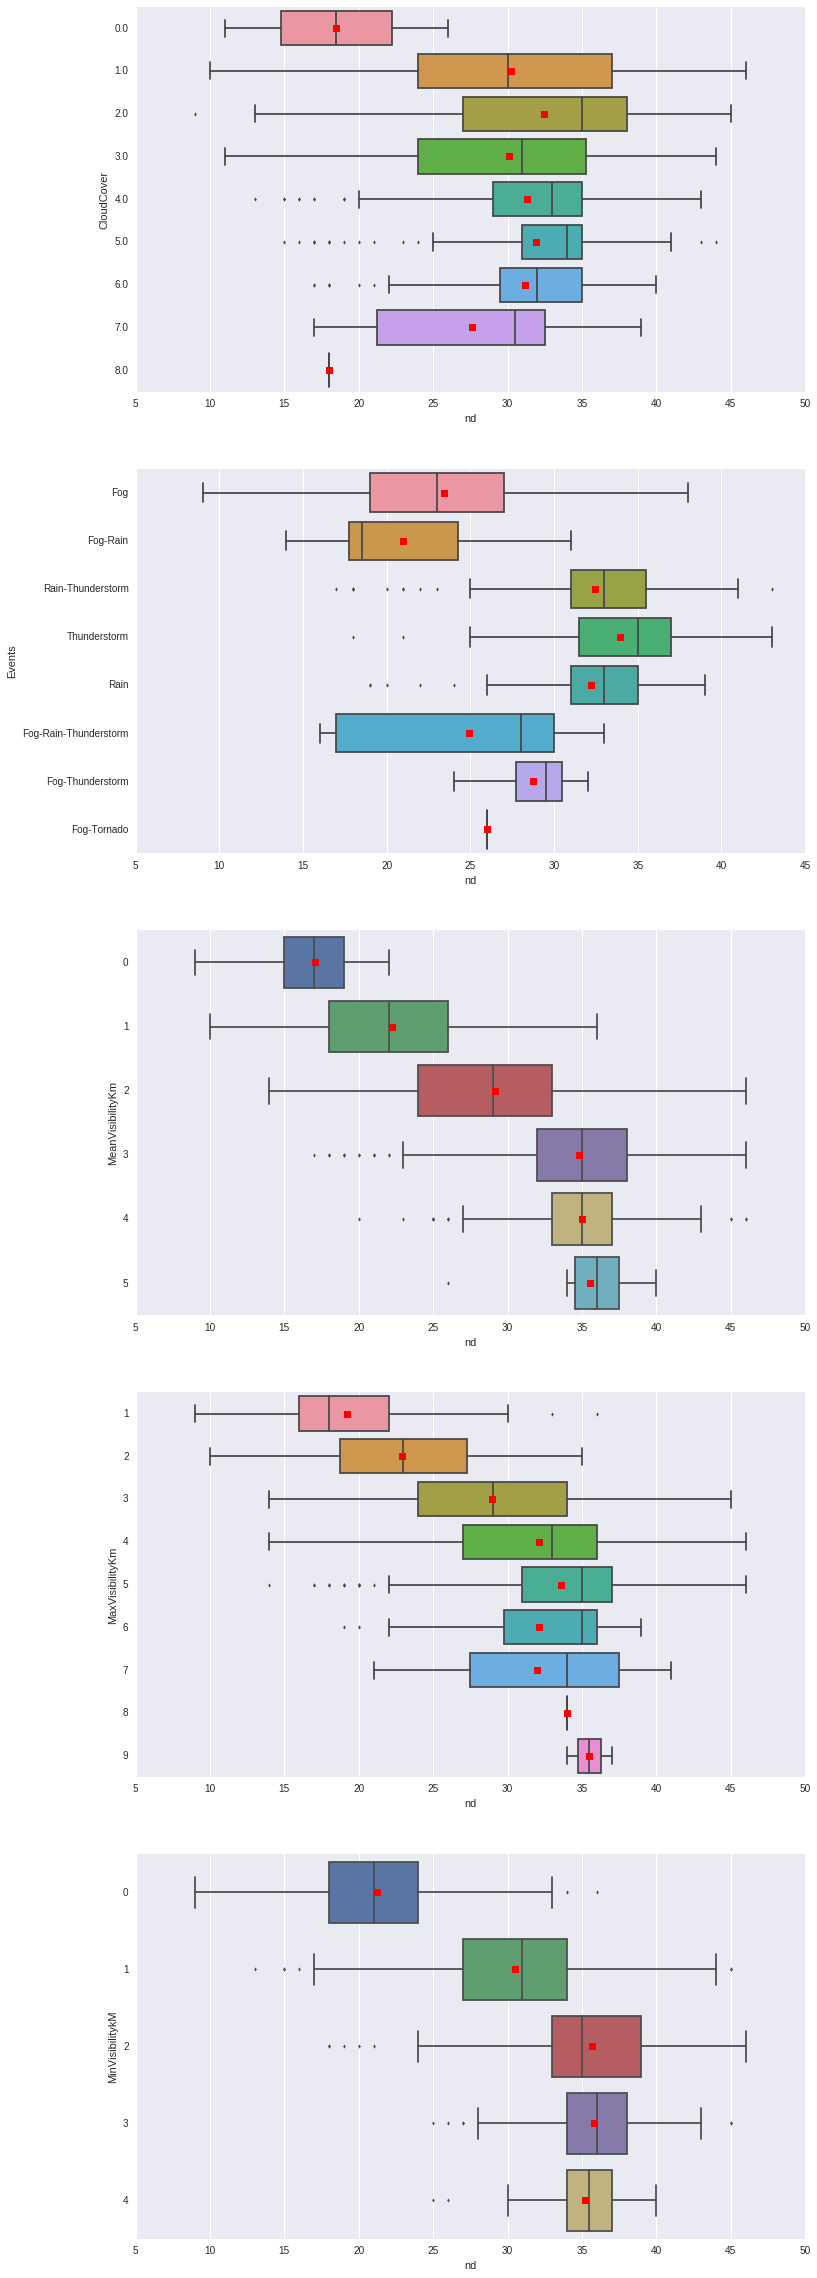

In [19]:
fig, axarr = plt.subplots(5, figsize=(12,40))
sns.boxplot(y = 'CloudCover', x = 'nd', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'Events', x = 'nd', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'MeanVisibilityKm', x = 'nd', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'MaxVisibilityKm', x = 'nd', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'MinVisibilitykM', x = 'nd', data = df,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
plt.show()

In [20]:
from scipy import stats, linalg

r, p = stats.spearmanr(df['CloudCover'], df['nd'])
print ('spearman correlation r between nd and CloudCover is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['Events'], df['nd'])
print ('spearman correlation r between nd and Events is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['MeanVisibilityKm'], df['nd'])
print ('spearman correlation r between nd and MeanVisibilityKm is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['MaxVisibilityKm'], df['nd'])
print ('spearman correlation r between nd and MaxVisibilityKm is %s with p = %s' %(r,p))
r, p = stats.spearmanr(df['MinVisibilitykM'], df['nd'])
print ('spearman correlation r between nd and MinVisibilitykM is %s with p = %s' %(r,p))

spearman correlation r between nd and CloudCover is -0.102562262278 with p = 0.000515017682429
spearman correlation r between nd and Events is -0.403282282419 with p = 6.13876274086e-46
spearman correlation r between nd and MeanVisibilityKm is 0.649563940746 with p = 5.8678266427e-138
spearman correlation r between nd and MaxVisibilityKm is 0.439206051338 with p = 4.26982043244e-55
spearman correlation r between nd and MinVisibilitykM is 0.681404544816 with p = 7.64782266434e-157


/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/stats/stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/stats/stats.py:5336: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  obs = np.r_[True, arr[1:] != arr[:-1]]


In [21]:
df['Events'].fillna('Normal', inplace=True)
df['CloudCover'].fillna('None', inplace=True)

In [22]:
from sklearn import preprocessing
def encode_features(df):
    features = [ 'Events','CloudCover']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    
data_train = encode_features(df)
data_train.head()

,IST,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,...,MaxWindSpeedKm/h,MeanWindSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,date,month,year,nd
0,01/01/13,15,9,4,12,7,4,100,95,67,...,11,6,0.0,2,0,302,1,1,2013,9
1,02/01/13,9,7,6,9,7,6,100,100,100,...,16,6,0.0,1,0,277,2,1,2013,10
2,03/01/13,10,7,4,10,7,4,100,99,87,...,13,10,0.0,2,0,299,3,1,2013,13
3,04/01/13,13,8,3,9,5,3,100,92,63,...,13,6,0.0,3,0,289,4,1,2013,11
4,05/01/13,11,6,2,9,6,2,100,97,76,...,13,8,0.0,1,0,295,5,1,2013,10


In [23]:
all_data=df

In [24]:
del all_data['WindDirDegrees']

In [247]:
X_all = all_data.drop(['nd', 'IST'], axis=1)
y_all = (all_data['nd'])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,Ridge,ElasticNet,BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

num_test = 0.0
    
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test,random_state=95)
model_lasso = LassoCV(alphas = [ 0.12,0.112,0.1,0.09,0.08]).fit(X_train, y_train)
#a = model_lasso.predict(X_test)
#print mean_absolute_error(y_test,a)


In [248]:

model_ridge=Ridge().fit(X_train,y_train)
#b = model_ridge.predict(X_test)
#print mean_absolute_error(y_test,b)

In [249]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_all, y_all, test_size=num_test,random_state=10)
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
model_gbm=GradientBoostingRegressor(random_state=8,n_estimators=46,learning_rate=0.1,max_depth=3,min_samples_split=100,min_samples_leaf=1,subsample=0.7).fit(X_train1,y_train1)
#c = model_gbm.predict(X_test1)
#print mean_absolute_error(y_test1,c)

In [250]:
import xgboost as xgb

    
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_all, y_all, test_size=num_test,random_state=10)
model_xgb=xgb.XGBRegressor(n_estimators=90,max_depth=4,min_child_weight=2,subsample=1.0).fit(X_train3,y_train3)
#d=model_xgb.predict(X_test3)
#print mean_absolute_error(y_test3,d)

In [251]:
    
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y_all, test_size=num_test,random_state=82)
from sklearn.neural_network import MLPRegressor
model_nn=MLPRegressor(solver='lbfgs',random_state=77).fit(X_train2,y_train2)
#e=model_nn.predict(X_test2)
#print mean_absolute_error(y_test2,e)

In [252]:
model_en=ElasticNet().fit(X_train,y_train)
#f=model_en.predict(X_test)
#print mean_absolute_error(y_test,f)

In [253]:
model_bn=BayesianRidge().fit(X_train,y_train)
#g=model_bn.predict(X_test)
#print mean_absolute_error(y_test,g)

In [254]:
test1=pd.read_csv('test.csv')
del test1['MaxGustSpeedKm/h']

In [255]:
test1['Events'].fillna('Normal', inplace=True)
test1['CloudCover'].fillna('None', inplace=True)

In [256]:
from sklearn import preprocessing
def encode_features(df):
    features = [ 'Events','CloudCover']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df
    
data_test = encode_features(test1)
data_test.head()

,IST,MaxTemperatureC,MeanTemperatureC,MinTemperatureC,DewPointC,MeanDewPointC,MinDewpointC,MaxHumidity,MeanHumidity,MinHumidity,...,MinVisibilitykM,MaxWindSpeedKm/h,MeanWindSpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees,date,month,year
0,18/02/16,23,18,14,17,13,10,88,74,50,...,0,19,8,0.0,5,1,291,18,2,2016
1,19/02/16,29,22,15,18,15,13,100,71,34,...,0,13,6,0.0,5,0,287,19,2,2016
2,20/02/16,28,23,18,18,17,15,88,70,51,...,0,21,8,0.0,4,0,276,20,2,2016
3,21/02/16,27,21,15,16,12,7,100,68,26,...,0,24,13,0.0,3,0,284,21,2,2016
4,22/02/16,27,19,11,11,9,7,88,57,18,...,0,23,11,0.0,7,0,275,22,2,2016


In [257]:
ids = test1['IST']
del test1['IST']
del test1['WindDirDegrees']
p2=model_gbm.predict(test1)
p1=model_nn.predict(test1)
p=p1*0.3+p2*0.7
output = pd.DataFrame({ 'IST' : ids, 'MaxTemperatureC': p })
output.to_csv('TEMP.csv', index = False)


In [258]:
df=pd.read_csv('TEMP.csv')

In [259]:
y=df['MaxTemperatureC']

In [260]:
test1 = test1[test1.MaxTemperatureC != 23]
df=df[df.IST!='2016-11-30']
print mean_absolute_error(df['MaxTemperatureC'],test1['MaxTemperatureC'])
print mean_squared_error(df['MaxTemperatureC'],test1['MaxTemperatureC'])

1.69850509991


NameError: name 'mean_squared_error' is not defined